# Linear Regression From Scratch.

    Divyanshu Vyas | dvyas13ad@gmail.com
    
    This Notebook will help us understand how we can perform Linear Regresssion with Just basic Python Knowledge.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

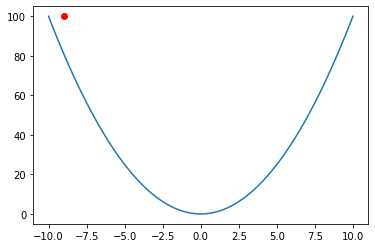

In [15]:
x = np.linspace(-10,10,100)

y = x**2

plt.plot(x,y)
plt.scatter(-9,100 , color='red')

In [4]:
x1 = np.random.random(10000) #distance mall
x2 = np.random.random(10000) #size
x3 = np.random.random(10000) #age

In [6]:
y = x1 +5*x2 - 10*x3 + 20

w_actual = [1 , 5, -10]
b_actual = 20

In [8]:
df = pd.DataFrame({'x1':x1 , 'x2':x2 , 'x3' :x3 , 'y':y})

df.head()

,x1,x2,x3,y
0,0.508908,0.835660,0.553935,19.147864
1,0.726204,0.392882,0.343057,19.260043
2,0.505177,0.973191,0.697124,18.399889
3,0.333480,0.989429,0.809244,17.188183
4,0.782781,0.238237,0.360815,18.365819


In [11]:
X = np.array(df[['x1' , 'x2' , 'x3']])

y = np.array(df['y']).reshape(10000,1)

#(10000,1)


#X --> (10000 , 3)
#y --> (10000 , 1)
#W ---> (3,1)
#b --> (1,1) or scalar
# Z--> (10000 , 1)

#Y(P) = Z = W.X + b    # np.dot(X,W)

(10000, 1)

In [12]:
def cost(w,b,X,y):
    
    #X - 10000x3
    #y - 10000x1
    #w - 3x1
    #b = 1x1
    
    Z = np.dot(X , w) + b
    
    L = (y - Z)**2
    
    m = len(y)
    
    J = np.sqrt((1/m)*np.sum(L))
    
    return J
    

# Some Formulas

## 1. $ J(w,b) = \frac {1}{m} \sum [y - (W.X + b)]^2 $

## 2. $ \frac {\partial J}{\partial W} = \frac {-2}{m} (X^T . [y - (W.X + b)]) $

## 3. $ \frac {\partial J} {\partial b} = \frac {-2}{m} \sum [ y - (W.X + b) ] $

In [14]:
def gradient(w,b,X,y):
    
    #dw = dJ/dw = 3x1
    #db = dJ/db = 1x1
    
        
    #X - 10000x3
    #y - 10000x1
    #w - 3x1
    #b = 1x1
    
    Z = np.dot(X , w) + b
    
    J = cost(w,b,X,y)
    
    m = X.shape[0]
    
    dw = (-2/m)*np.dot(X.T , (y - Z))
    
    db = (-2/m)*np.sum(y - Z)
    
    return dw , db
    
    

In [30]:
# X.shape

# y.shape

In [13]:
#Just a check on how terrible our initial guess is performing.
w = np.random.random((3,1))
b = 0

cost(w,b,X,y)

17.504301537642572

# Now Let's Make it Learn!

In [22]:
def learning(w,b,X,y,epoch):
    
    #dw = dJ/dw = 3x1
    #db = dJ/db = 1x1
    
    #X - 10000x3
    #y - 10000x1
    #w - 3x1
    #b = 1x1
    
    Z = np.dot(X , w) + b
    
    costs = []
    
    costs.append(cost(w,b,X,y))
    
    for e in range(epoch):
        
        dw , db = gradient(w,b,X,y)
        
        w = w - 0.005*dw
        
        b = b - 0.005*db
        
        if e%100 == 0:
            costs.append(cost(w,b,X,y))
        
    
    wf = w
    bf = b
    
    return wf , bf , costs
    
    
    
        
        
    
    
    
    

In [23]:
wf , bf , costs = learning(w,b,X,y,100)

In [20]:
wf , bf

(array([[ 40.3625116 ,  37.93906267,  35.56507188,  33.24053923,
          30.96546473,  28.73984836,  26.56369014,  24.43699006,
          22.35974812,  20.33196432,  18.35363866,  16.42477115,
          14.54536177,  12.71541054,  10.93491745,   9.2038825 ,
           7.52230569,   5.89018702,   4.3075265 ,   2.77432412,
           1.29057987,  -0.14370623,  -1.52853419,  -2.86390401,
          -4.14981568,  -5.38626922,  -6.57326461,  -7.71080187,
          -8.79888098,  -9.83750195, -10.82666478, -11.76636946,
         -12.65661601, -13.49740441, -14.28873468, -15.0306068 ,
         -15.72302078, -16.36597662, -16.95947431, -17.50351387,
         -17.99809528, -18.44321856, -18.83888369, -19.18509068,
         -19.48183953, -19.72913023, -19.9269628 , -20.07533722,
         -20.1742535 , -20.22371165, -20.22371165, -20.1742535 ,
         -20.07533722, -19.9269628 , -19.72913023, -19.48183953,
         -19.18509068, -18.83888369, -18.44321856, -17.99809528,
         -17.50351387, -1

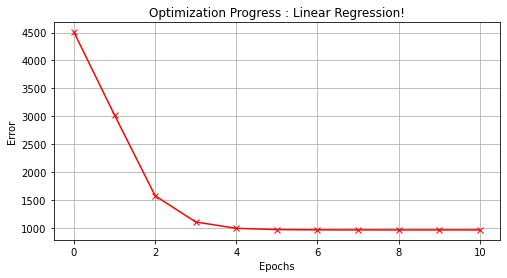

In [21]:
plt.figure(figsize = (8,4))
plt.style.use('default')
plt.plot(costs ,c='red' , marker='x')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Optimization Progress : Linear Regression!')

plt.grid()

In [126]:
Actual = ['w1 = 1' , 'w2 =5' , 'w3 = -10', 'b = 20']

ModelResults = [f'w1 = {wf[0][0]}' ,f'w2 = {wf[1][0]}',f'w3 = {wf[2][0]}', f'b = {bf}' ]

In [128]:
results = pd.DataFrame({'Actual Parameters':Actual , 'Model-Parameters':ModelResults})

In [129]:
results

,Actual Parameters,Model-Parameters
0,w1 = 1,w1 = 1.0657494018932743
1,w2 =5,w2 = 5.063592418656829
2,w3 = -10,w3 = -9.92998037745159
3,b = 20,b = 19.895068110806836
